In [9]:
# Import required dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import datetime as dt

In [11]:
ticker = "DIS" # Ticker symbol for the desired asset
benchmark_ticker = "^GSPC" # Ticker symbol for the benchmark index
start_date = "2022-01-01" # Start date for obtaining historical price data
end_date = "2022-12-31" # End date for obtaining historical price data

# Fetch historical price data for the asset and benchmark from a reliable data source
asset_data = yf.download(ticker, start_date, end_date)
benchmark_data = yf.download(benchmark_ticker, start_date, end_date)

# Extract the "close" prices from the data
asset_prices = asset_data["Close"]
benchmark_prices = benchmark_data["Close"]

# Calculate the asset returns and benchmark returns
asset_returns = asset_prices.pct_change().dropna()
benchmark_returns = benchmark_prices.pct_change().dropna()

# Calculate the average return
average_return = asset_returns.mean()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
# Standard Deviation
standard_deviation = asset_returns.std()

In [13]:
# Sharpe Ratio
risk_free_rate = 0.03  # Assume a risk-free rate of 3%
sharpe_ratio = (average_return - risk_free_rate) / standard_deviation

In [14]:
# Sortino Ratio
downside_returns = asset_returns[asset_returns < 0]
average_downside_return = downside_returns.mean()
sortino_ratio = (average_return - risk_free_rate) / downside_returns.std()

In [15]:
# Beta
model = sm.OLS(asset_returns, sm.add_constant(benchmark_returns)).fit()
beta = model.params[1]

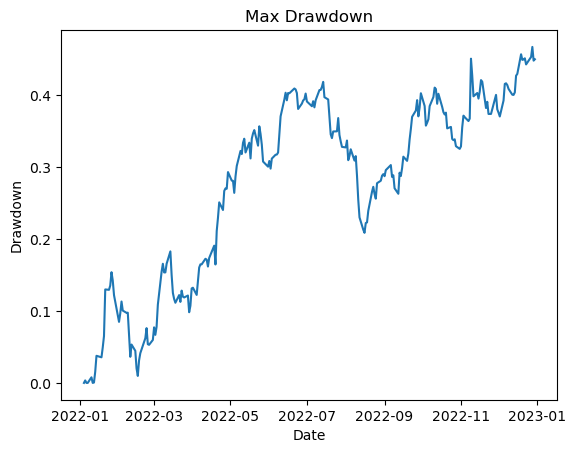

In [16]:
# Max Drowdown
cumulative_returns = (asset_returns + 1).cumprod()
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_max - cumulative_returns) / cumulative_max
plt.plot(drawdown)
plt.title('Max Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.show()
max_drawdown = drawdown.max()

In [17]:
# Value at Risk (VaR)
confidence_level = 0.95
var = np.percentile(asset_returns, 100 - confidence_level * 100)

In [18]:
# Conditional Value at Risk (CVaR)
tail_returns = asset_returns[asset_returns < var]
cvar = tail_returns.mean()

In [19]:
# R-squared
model = sm.OLS(asset_returns, sm.add_constant(benchmark_returns)).fit()
r_squared = model.rsquared

In [23]:
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Sortino Ratio: {sortino_ratio}")
print(f"Beta Value: {beta}")
print(f"Value At Risk: {var}")
print(f"Conditional Value at Risk: {cvar}")
print(f"R-Squared Value: {r_squared}")

Sharpe Ratio: -1.3723210819396399
Sortino Ratio: -2.005492174127564
Beta Value: 1.151913035742402
Value At Risk: -0.03740578609342775
Conditional Value at Risk: -0.05131160665925473
R-Squared Value: 0.5647410453359142
